C:\Users\coren\python\envs\Machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coren\python\envs\Machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


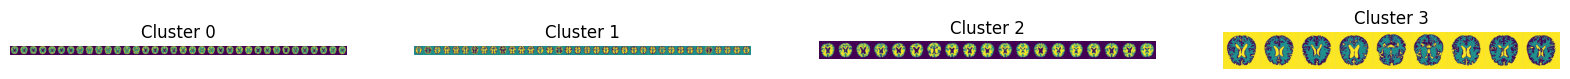

In [1]:
# Step 1: Installation of Libraries
# Run these commands in your terminal or command prompt
# pip install numpy opencv-python scikit-learn matplotlib

import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Importing Libraries and Loading Images

# Define the path to the directory containing your images
image_folder_path = "dataset/segmentation_dataset_ad_kmean_3/merge"

# Step 3: Loading and Preprocessing Images

def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (100, 100))  # Resize images for uniformity
            images.append(img)
    return np.array(images)

# Load images from the specified folder
images = load_images(image_folder_path)

# Step 4: Image Clustering using K-means

def perform_clustering(images, num_clusters=4):
    # Reshape the images to a 1D array
    reshaped_images = images.reshape(images.shape[0], -1)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(reshaped_images)

    # Get cluster labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Assign cluster labels to images
    clustered_images = []
    for i in range(len(images)):
        cluster_label = labels[i]
        clustered_images.append((images[i], cluster_label))

    return clustered_images, centers

# Step 5: Displaying Clustered Images

def display_clustered_images(clustered_images, centers):
    fig, axes = plt.subplots(1, len(centers), figsize=(20, 10))
    for i, ax in enumerate(axes):
        cluster_images = [img for img, label in clustered_images if label == i]
        ax.imshow(np.concatenate(cluster_images, axis=1))
        ax.set_title(f"Cluster {i}")
        ax.axis("off")
    plt.show()

# Perform clustering
num_clusters = 4  # You can adjust the number of clusters as needed
clustered_images, centers = perform_clustering(images, num_clusters)

# Display clustered images
display_clustered_images(clustered_images, centers)
